**Exploratory Data Analysis on Haberman Dataset**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/haberman.csv')

In [7]:
df.head()#to check iwhether data is loaded properly.

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


above block shows there are 306 rows of data. There are 3 features, age, year and nodes. Status is class label.
Visiting this link https://www.kaggle.com/gilsousa/habermans-survival-data-set shows that:
**Age:** Age of patient at time of surgery for breast cancer.
**Year:** Patient's year of surgery for breast cancer.
**Nodes:** Number of positive axillary nodes detected.
**status:** 1 class label = patient survived 5 years or longer after surgery for breast cancer.
2 class label = the patient died within 5 years after the surgery for breast cancer.


---
One important information is of Non-Null Count column. Each variable has all the rows with non-null values. So there is no need for replacement of null values as there are none.




In [21]:
print(df['age'].value_counts())
print(df['year'].value_counts())
print(df['nodes'].value_counts())
print(df['status'].value_counts())

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64
58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64
0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64
1    225
2     81
Name: status, dtype: int64


Get the physicial counts of the data of all the independent and dependent variables. 1st column shows the actual variable values and 2nd column shows the count. The ratio of people who died to people who survived is almost 3:1

In [22]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


The above observations can be made more concrete here. Seeing 'age' shows that youngest patient is 30 years old and oldest is 83. Seeing 'nodes' shows that min value is 0 and max is 52 but mean is around 4, which means most patient's nodes values are small. Status mean is 1.26 which shows class 1 has more points than class 2.

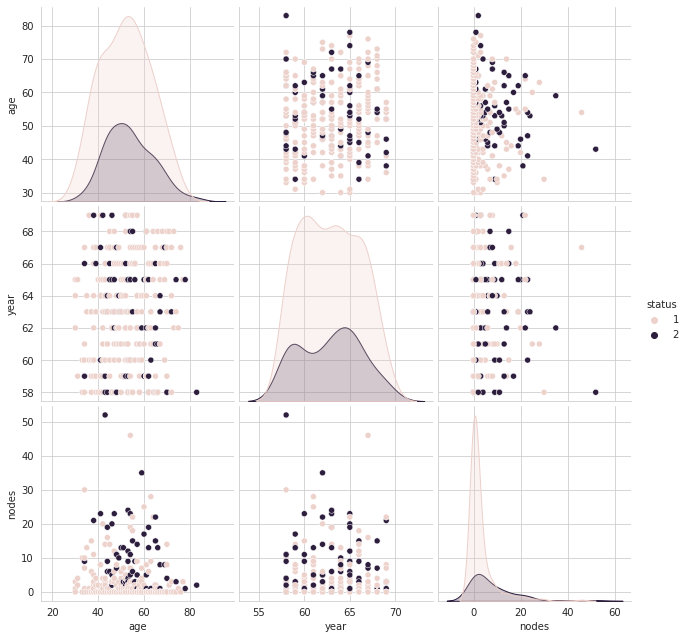

In [15]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="status",size=3)
plt.show();

Looking at the pairplots shows us that no combinations of two features can separate the two classes perfectly, just using any two features arent making the classes linearly separable.


---
Seeing the histogram of nodes variables shows us that class 1 values are condenced around 0 whereas class 2 are not. This shows us that patients that survived surgery have very less auxillary nodes in them. The ones who died the surgery have fair amount of auxillary nodes in them.


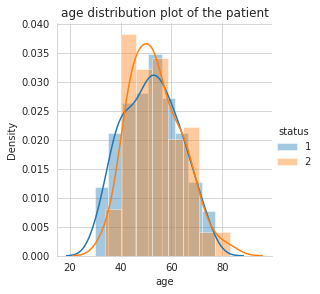

In [26]:
sns.FacetGrid(df,hue='status',size=4).map(sns.distplot,'age').add_legend()
plt.title('age distribution plot of the patient');
plt.show();

We can see, age values of patients of both the classes are overlapping, hence cant classifiy with age variable alone. Although one observation that we can make is patients of both the classes, most of them were between 40 to 60 years old.

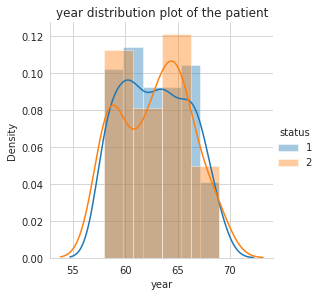

In [27]:
sns.FacetGrid(df,hue='status',size=4).map(sns.distplot,'year').add_legend();
plt.title('year distribution plot of the patient')
plt.show();

We can see, year values of patients of both the classes are overlapping, hence cant classifiy with year variable alone.

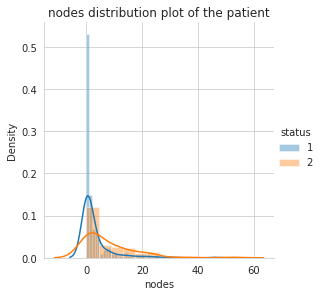

In [28]:
sns.FacetGrid(df,hue='status',size=4).map(sns.distplot,'nodes').add_legend();
plt.title('nodes distribution plot of the patient')
plt.show();

We can see for patients who survived, most of them have nodes values of 0. And for those who survived, graph drops quickly when moving away from 0 nodes values which shows that patients who servived had fewer auxillary nodes in them as compared who who died (as died patients graph drops slowly when moving away from 0 i.e., dead patients have fair amount of auxillary nodes in them).

In [17]:
alive = df.loc[df['status']==1]
deaths = df.loc[df['status']==2]

Let us now do analysis for classes separately.

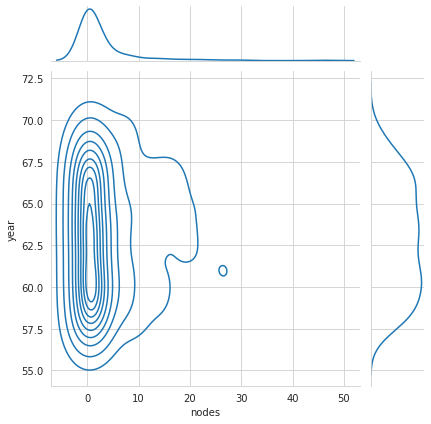

In [30]:
sns.jointplot(x='nodes',y='year',data=alive,kind='kde');
plt.show()

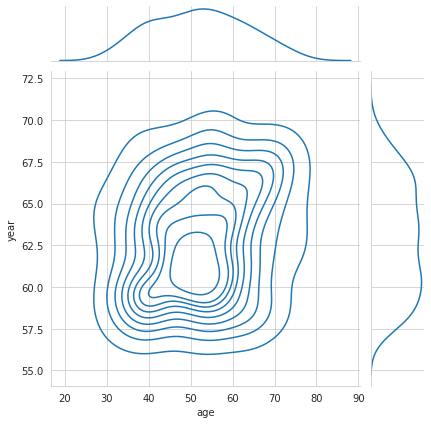

In [31]:
sns.jointplot(x='age',y='year',data=alive,kind='kde');
plt.show()

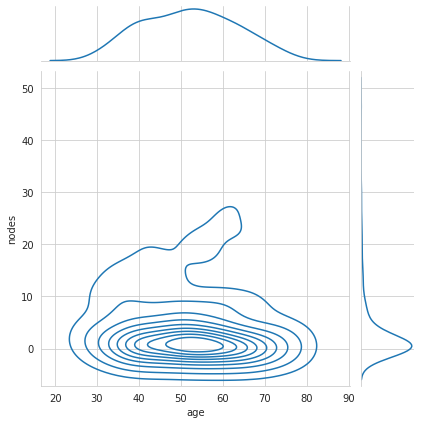

In [32]:
sns.jointplot(x='age',y='nodes',data=alive,kind='kde');
plt.show()

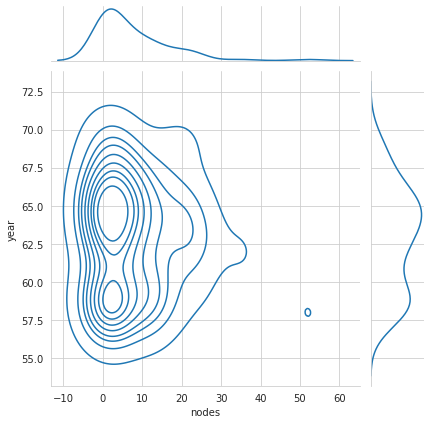

In [33]:
sns.jointplot(x='nodes',y='year',data=deaths,kind='kde');
plt.show()

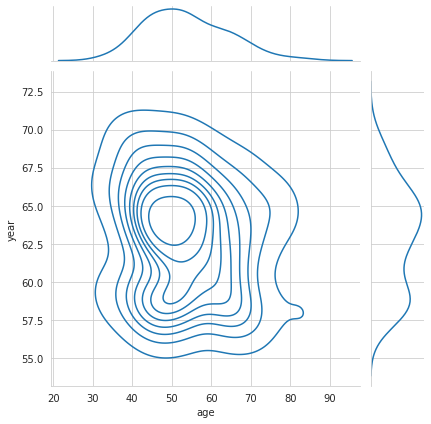

In [34]:
sns.jointplot(x='age',y='year',data=deaths,kind='kde');
plt.show()

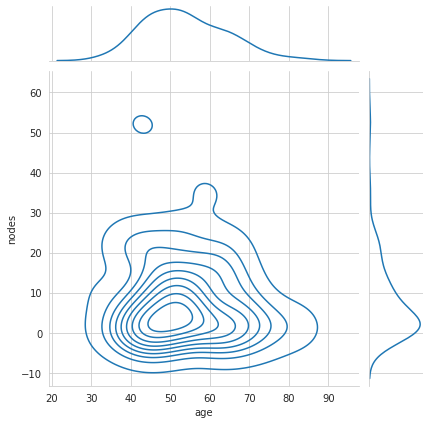

In [35]:
sns.jointplot(x='age',y='nodes',data=deaths,kind='kde');
plt.show()

[0.0141844  0.00945626 0.         0.00945626 0.02364066 0.00945626
 0.00945626 0.02836879 0.04255319 0.02364066 0.0141844  0.03309693
 0.03309693 0.03309693 0.01891253 0.02836879 0.         0.0141844
 0.03782506 0.01891253 0.03782506 0.04728132 0.01891253 0.04728132
 0.02364066 0.04255319 0.03782506 0.02364066 0.03782506 0.03309693
 0.03309693 0.01891253 0.02836879 0.         0.01891253 0.03309693
 0.02364066 0.02836879 0.0141844  0.01891253 0.00945626 0.0141844
 0.02364066 0.00472813 0.0141844  0.00945626 0.00472813 0.00472813
 0.00472813 0.00472813]
[30.   30.94 31.88 32.82 33.76 34.7  35.64 36.58 37.52 38.46 39.4  40.34
 41.28 42.22 43.16 44.1  45.04 45.98 46.92 47.86 48.8  49.74 50.68 51.62
 52.56 53.5  54.44 55.38 56.32 57.26 58.2  59.14 60.08 61.02 61.96 62.9
 63.84 64.78 65.72 66.66 67.6  68.54 69.48 70.42 71.36 72.3  73.24 74.18
 75.12 76.06 77.  ]
[0.01333333 0.00888889 0.         0.00888889 0.02222222 0.00888889
 0.00888889 0.02666667 0.04       0.02222222 0.01333333 0.031111

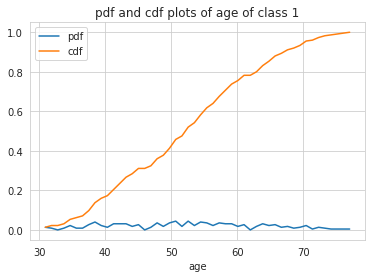

In [36]:
count, bin_edge = np.histogram(alive['age'],bins=50,density=True)
print(count)
print(bin_edge)
pdf = count/sum(count)

print(pdf)
sns.set_style('whitegrid');
plt.plot(bin_edge[1:],pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],cdf)
plt.xlabel('age')
plt.title('pdf and cdf plots of age of class 1')
plt.gca().legend(('pdf','cdf')); #Reference for adding leged https://stackoverflow.com/questions/57578336/how-to-add-legend-to-below-plot

Above graph shows that people survived from almost every age group as pdf is almost horizontal and cdf is almost linearly increasing. 

[0.02519526 0.         0.         0.         0.01259763 0.01259763
 0.         0.03779289 0.02519526 0.05039053 0.03779289 0.03779289
 0.05039053 0.03779289 0.03779289 0.02519526 0.02519526 0.02519526
 0.05039053 0.07558579 0.05039053 0.02519526 0.02519526 0.03779289
 0.         0.01259763 0.02519526 0.03779289 0.03779289 0.01259763
 0.         0.05039053 0.02519526 0.02519526 0.         0.01259763
 0.02519526 0.         0.01259763 0.         0.01259763 0.
 0.         0.         0.01259763 0.         0.         0.
 0.         0.01259763]
[34.   34.98 35.96 36.94 37.92 38.9  39.88 40.86 41.84 42.82 43.8  44.78
 45.76 46.74 47.72 48.7  49.68 50.66 51.64 52.62 53.6  54.58 55.56 56.54
 57.52 58.5  59.48 60.46 61.44 62.42 63.4  64.38 65.36 66.34 67.32 68.3
 69.28 70.26 71.24 72.22 73.2  74.18 75.16 76.14 77.12 78.1  79.08 80.06
 81.04 82.02 83.  ]
[0.02469136 0.         0.         0.         0.01234568 0.01234568
 0.         0.03703704 0.02469136 0.04938272 0.03703704 0.03703704
 0.04938272

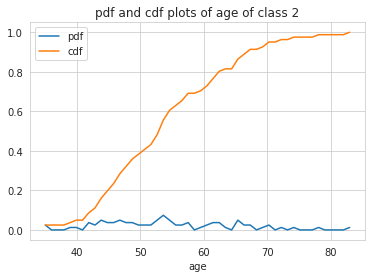

In [37]:
count, bin_edge = np.histogram(deaths['age'],bins=50,density=True)
print(count)
print(bin_edge)
pdf = count/sum(count)
print(pdf)
sns.set_style('whitegrid');
plt.plot(bin_edge[1:],pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],cdf)
plt.xlabel('age')
plt.title('pdf and cdf plots of age of class 2')
plt.gca().legend(('pdf','cdf'));

[0.56521739 0.15942029 0.07246377 0.06280193 0.04830918 0.00966184
 0.01932367 0.02415459 0.02415459 0.00966184 0.00966184 0.00483092
 0.         0.00483092 0.00483092 0.01449275 0.00483092 0.00483092
 0.         0.00483092 0.00483092 0.00483092 0.         0.00966184
 0.         0.         0.         0.00483092 0.         0.
 0.00483092 0.         0.00483092 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00483092]
[ 0.    0.92  1.84  2.76  3.68  4.6   5.52  6.44  7.36  8.28  9.2  10.12
 11.04 11.96 12.88 13.8  14.72 15.64 16.56 17.48 18.4  19.32 20.24 21.16
 22.08 23.   23.92 24.84 25.76 26.68 27.6  28.52 29.44 30.36 31.28 32.2
 33.12 34.04 34.96 35.88 36.8  37.72 38.64 39.56 40.48 41.4  42.32 43.24
 44.16 45.08 46.  ]
[0.52       0.14666667 0.06666667 0.05777778 0.04444444 0.00888889
 0.01777778 0.02222222 0.02222222 0.00888889 0.00888889 0.00444444
 0.         0.00444444 0.00

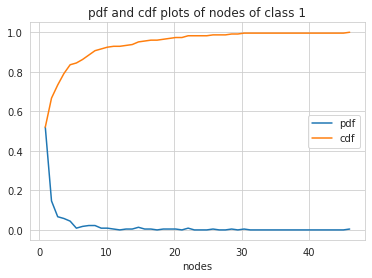

In [38]:
count, bin_edge = np.histogram(alive['nodes'],bins=50,density=True)
print(count)
print(bin_edge)
pdf = count/sum(count)
print(pdf)
sns.set_style('whitegrid');
plt.plot(bin_edge[1:],pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],cdf)
plt.xlabel('nodes')
plt.title('pdf and cdf plots of nodes of class 1')
plt.gca().legend(('pdf','cdf'));

Above pdf again shows us that people who survived, there is a very high chance that they have fewer auxillary noded in them as pdf has a high value around 0 and drops quickly as we move away from 0.

[0.32051282 0.05935423 0.08309592 0.03561254 0.04748338 0.03561254
 0.02374169 0.02374169 0.04748338 0.01187085 0.03561254 0.01187085
 0.04748338 0.01187085 0.02374169 0.         0.01187085 0.
 0.02374169 0.01187085 0.01187085 0.01187085 0.03561254 0.01187085
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01187085 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01187085]
[ 0.    1.04  2.08  3.12  4.16  5.2   6.24  7.28  8.32  9.36 10.4  11.44
 12.48 13.52 14.56 15.6  16.64 17.68 18.72 19.76 20.8  21.84 22.88 23.92
 24.96 26.   27.04 28.08 29.12 30.16 31.2  32.24 33.28 34.32 35.36 36.4
 37.44 38.48 39.52 40.56 41.6  42.64 43.68 44.72 45.76 46.8  47.84 48.88
 49.92 50.96 52.  ]
[0.33333333 0.0617284  0.08641975 0.03703704 0.04938272 0.03703704
 0.02469136 0.02469136 0.04938272 0.01234568 0.03703704 0.01234568
 0.04938272 0.01234568 0.02469136 0

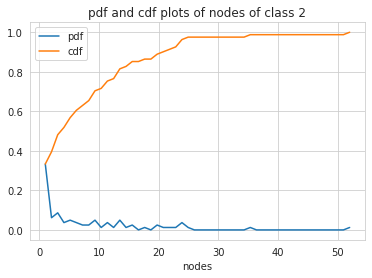

In [39]:
count, bin_edge = np.histogram(deaths['nodes'],bins=50,density=True)
print(count)
print(bin_edge)
pdf = count/sum(count)
print(pdf)
sns.set_style('whitegrid');
plt.plot(bin_edge[1:],pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],cdf)
plt.xlabel('nodes')
plt.title('pdf and cdf plots of nodes of class 2')
plt.gca().legend(('pdf','cdf'));

People who died also have high likelihood of having less nodes, but people who died have high chance that thier auxillary nodes may be around 10 or 15 as compared to ones who survived as thier nodes values of 10 or 15 are almost nil.

[0.48484848 0.         0.         0.         0.36363636 0.
 0.         0.         0.         0.48484848 0.         0.
 0.         0.46464646 0.         0.         0.         0.
 0.32323232 0.         0.         0.         0.44444444 0.
 0.         0.         0.         0.46464646 0.         0.
 0.         0.3030303  0.         0.         0.         0.
 0.44444444 0.         0.         0.         0.42424242 0.
 0.         0.         0.         0.2020202  0.         0.
 0.         0.14141414]
[58.   58.22 58.44 58.66 58.88 59.1  59.32 59.54 59.76 59.98 60.2  60.42
 60.64 60.86 61.08 61.3  61.52 61.74 61.96 62.18 62.4  62.62 62.84 63.06
 63.28 63.5  63.72 63.94 64.16 64.38 64.6  64.82 65.04 65.26 65.48 65.7
 65.92 66.14 66.36 66.58 66.8  67.02 67.24 67.46 67.68 67.9  68.12 68.34
 68.56 68.78 69.  ]
[0.10666667 0.         0.         0.         0.08       0.
 0.         0.         0.         0.10666667 0.         0.
 0.         0.10222222 0.         0.         0.         0.
 0.07111111 0.  

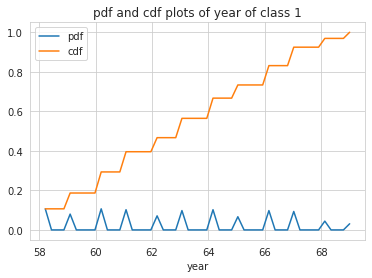

In [40]:
count, bin_edge = np.histogram(alive['year'],bins=50,density=True)
print(count)
print(bin_edge)
pdf = count/sum(count)
print(pdf)
sns.set_style('whitegrid');
plt.plot(bin_edge[1:],pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],cdf)
plt.xlabel('year')
plt.title('pdf and cdf plots of year of class 1')
plt.gca().legend(('pdf','cdf'));

One possible explanation can be that there was surge in number of operations after certain year gap as there are peaks at regular intervals in PDF (for patients who servived).

[0.67340067 0.         0.         0.         0.50505051 0.
 0.         0.         0.         0.22446689 0.         0.
 0.         0.16835017 0.         0.         0.         0.
 0.39281706 0.         0.         0.         0.44893378 0.
 0.         0.         0.         0.44893378 0.         0.
 0.         0.7295174  0.         0.         0.         0.
 0.33670034 0.         0.         0.         0.22446689 0.
 0.         0.         0.         0.16835017 0.         0.
 0.         0.22446689]
[58.   58.22 58.44 58.66 58.88 59.1  59.32 59.54 59.76 59.98 60.2  60.42
 60.64 60.86 61.08 61.3  61.52 61.74 61.96 62.18 62.4  62.62 62.84 63.06
 63.28 63.5  63.72 63.94 64.16 64.38 64.6  64.82 65.04 65.26 65.48 65.7
 65.92 66.14 66.36 66.58 66.8  67.02 67.24 67.46 67.68 67.9  68.12 68.34
 68.56 68.78 69.  ]
[0.14814815 0.         0.         0.         0.11111111 0.
 0.         0.         0.         0.04938272 0.         0.
 0.         0.03703704 0.         0.         0.         0.
 0.08641975 0.  

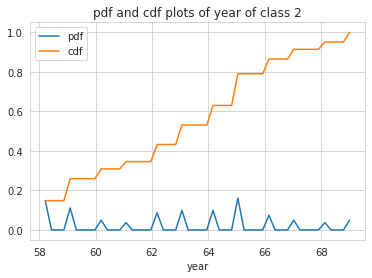

In [41]:
count, bin_edge = np.histogram(deaths['year'],bins=50,density=True)
print(count)
print(bin_edge)
pdf = count/sum(count)
print(pdf)
sns.set_style('whitegrid');
plt.plot(bin_edge[1:],pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],cdf)
plt.xlabel('year')
plt.title('pdf and cdf plots of year of class 2')
plt.gca().legend(('pdf','cdf'));

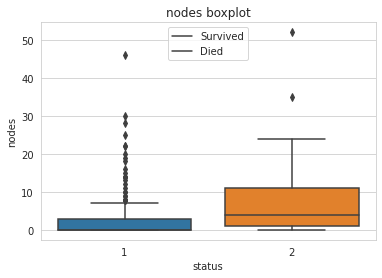

In [42]:
sns.boxplot(x='status',y='nodes',data=df)
plt.title('nodes boxplot')
plt.gca().legend(('Survived','Died'))
plt.show();



Box plot again confirms that number of auxillary nodes in patients who survived are less than who died as height of the box shows there are larger number of auxillary nodes in patients who died within 5 years

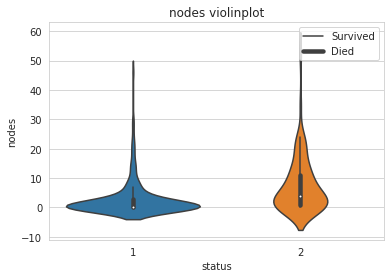

In [43]:
sns.violinplot(x='status', y='nodes', data = df)
plt.title('nodes violinplot')
plt.gca().legend(('Survived','Died'))
plt.show()

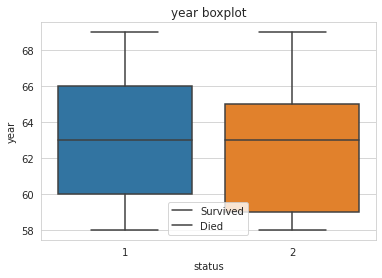

In [44]:
sns.boxplot(x='status',y='year',data=df)
plt.title('year boxplot')
plt.gca().legend(('Survived','Died'))
plt.show();


Above graph shows us that there is higher chance of survival if they were operated in late 1960s than early 1960s as boxplot of people who survived is shifted upwards that for people who died.

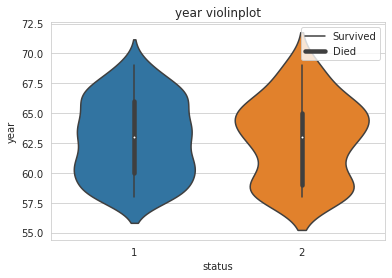

In [45]:
sns.violinplot(x='status', y='year', data = df)
plt.title('year violinplot')
plt.gca().legend(('Survived','Died'))
plt.show()

death rate were highest in around 1965 and then dropped afterwards

**Conclusion**

The given dataset is imbalanced. There were more patients who died than who surivived (almost 3:1).

No two features are making the two classes linearly separable. There is high overlap between every pair of feature. 

Nodes values was giving the most information about the two classes.  nodes values of patient was most important feaure for classifying patients between 2 classes. Patients those who had 0 nodes has a very high chance of survival. As number of nodes values increases, chances for  survival drops sharply. 